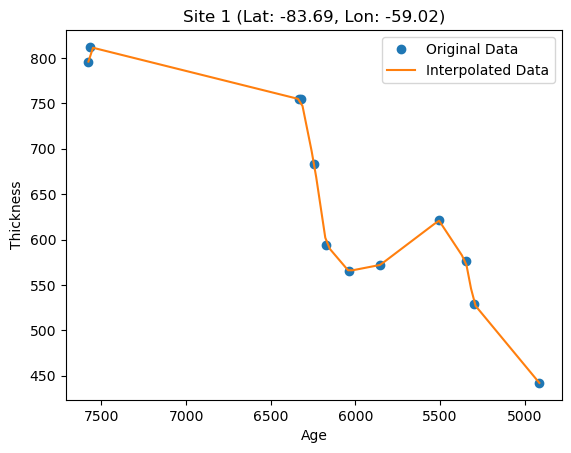

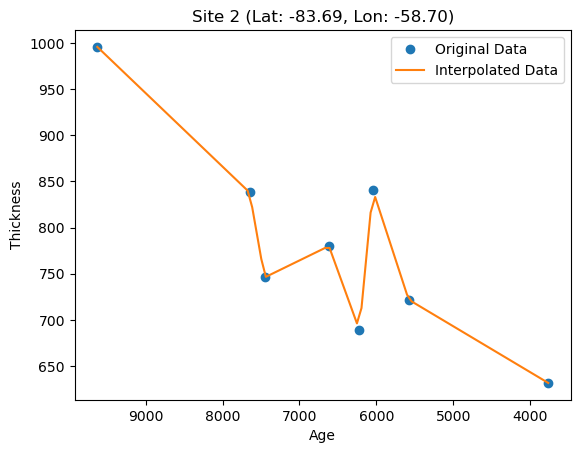

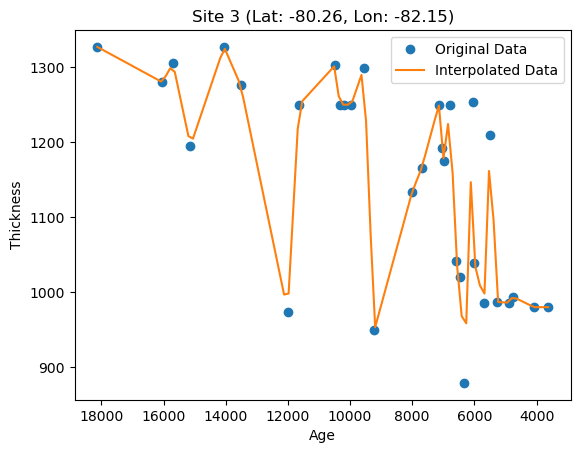

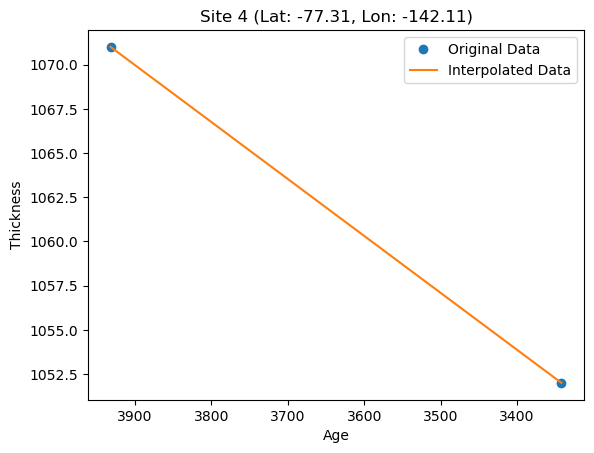

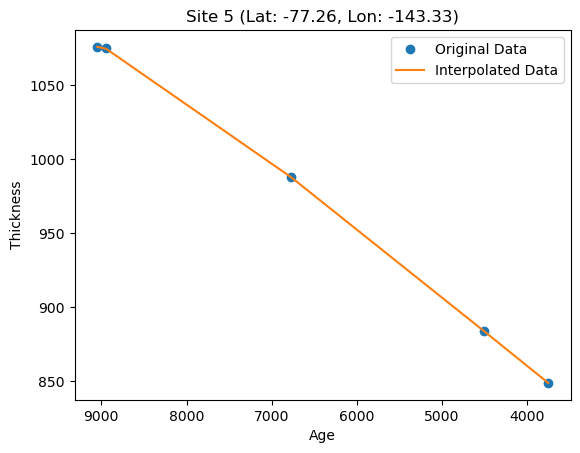

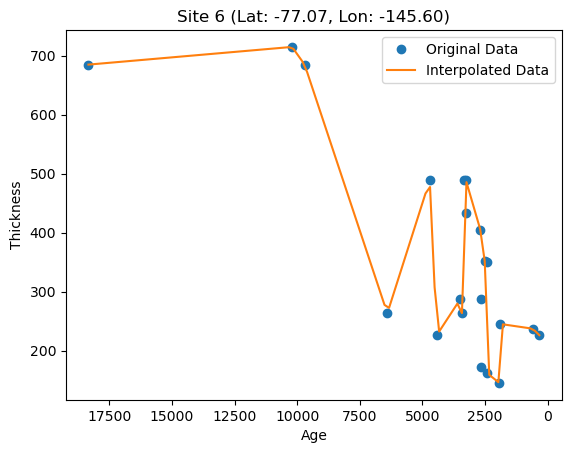

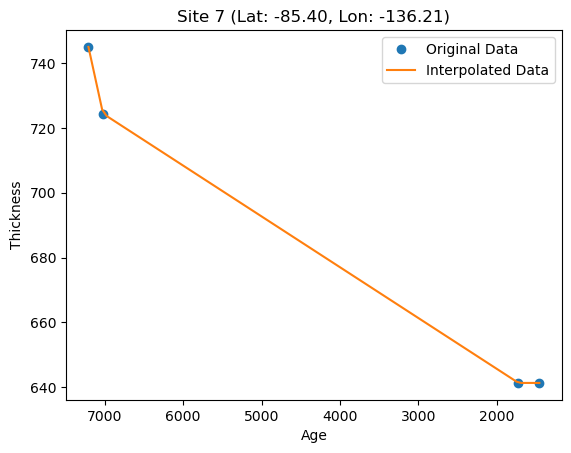

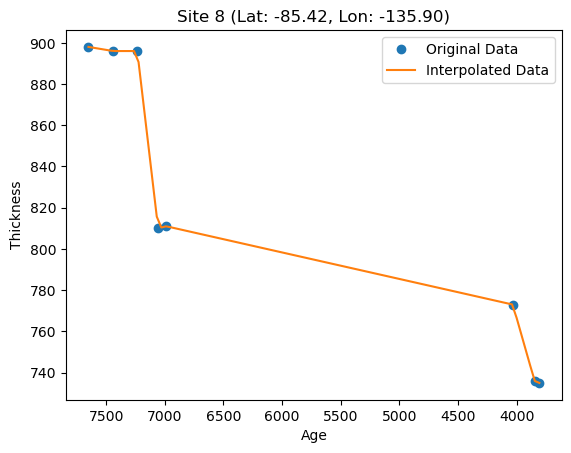

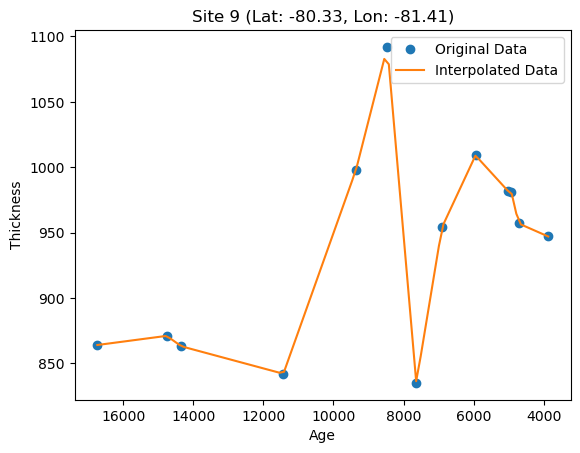

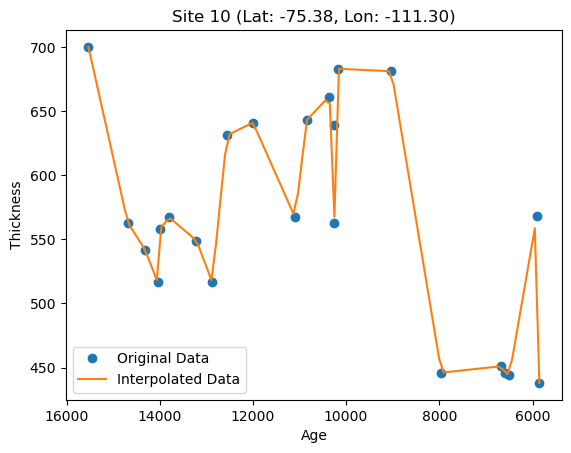

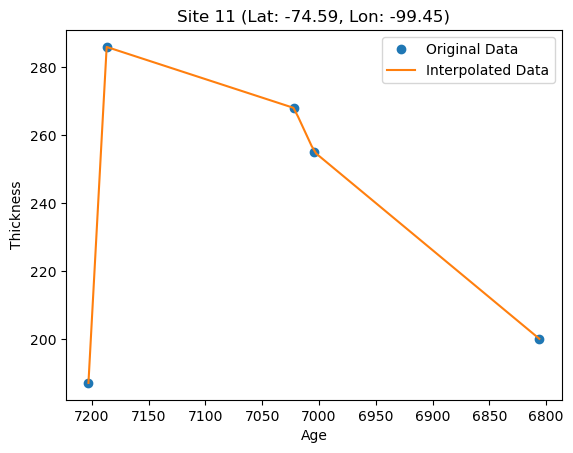

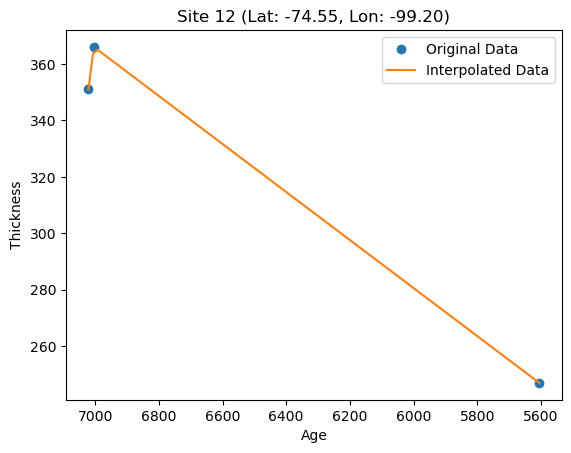

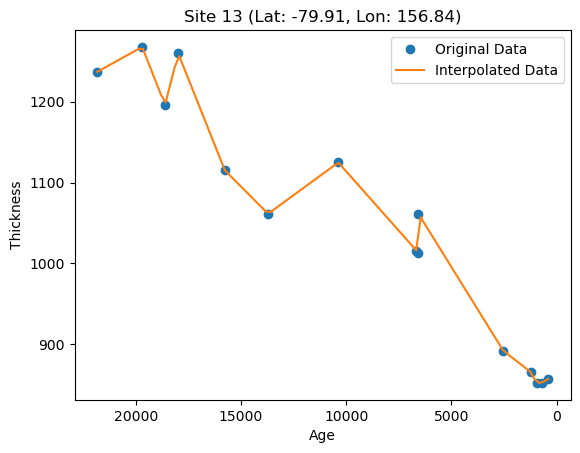

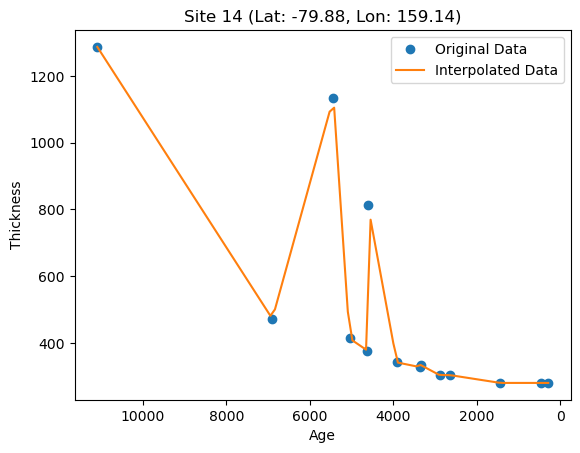

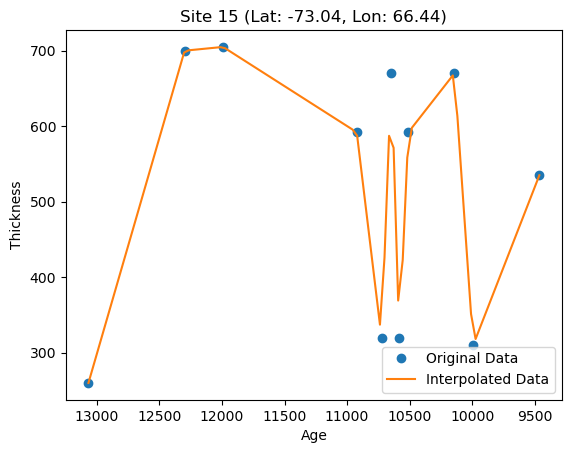

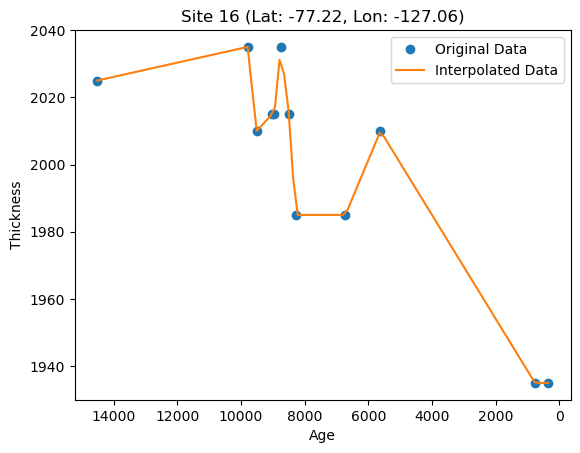

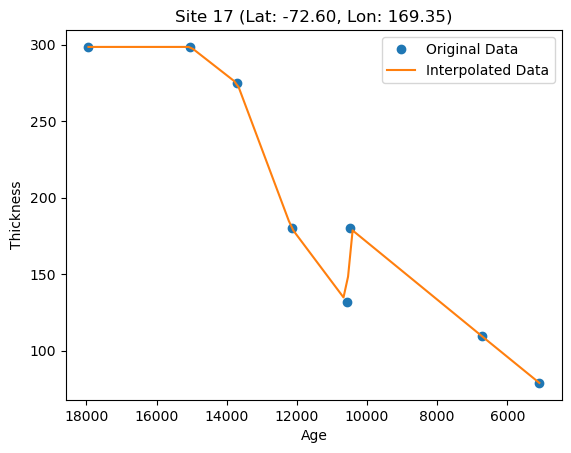

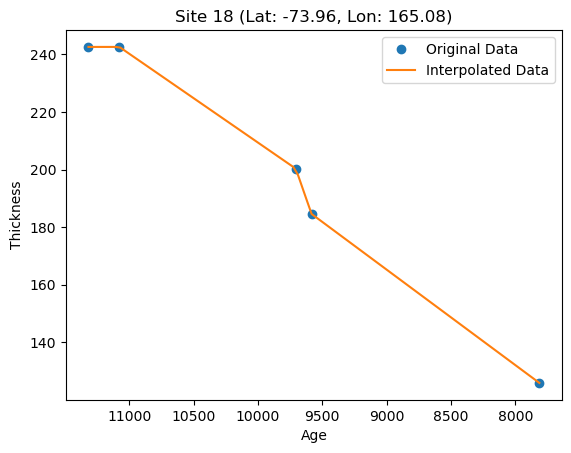

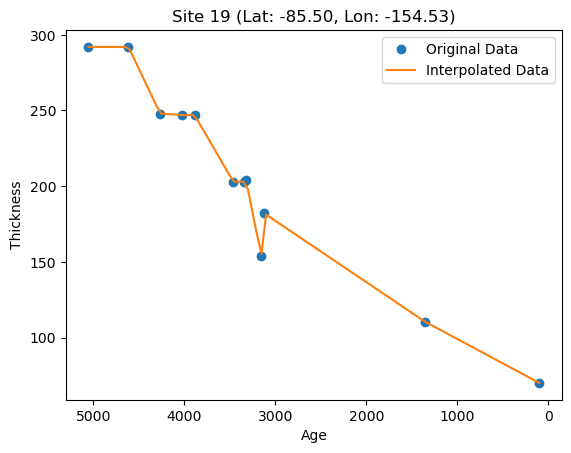

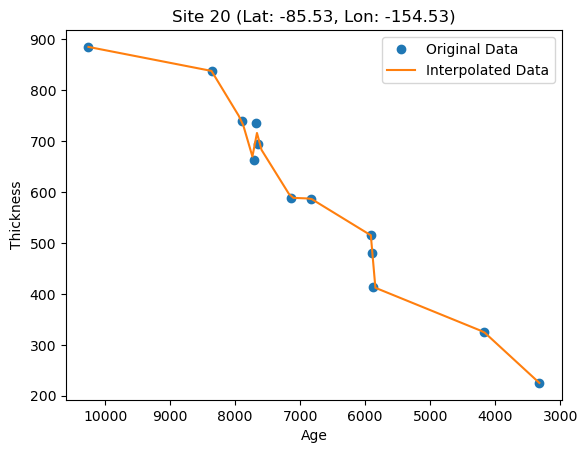

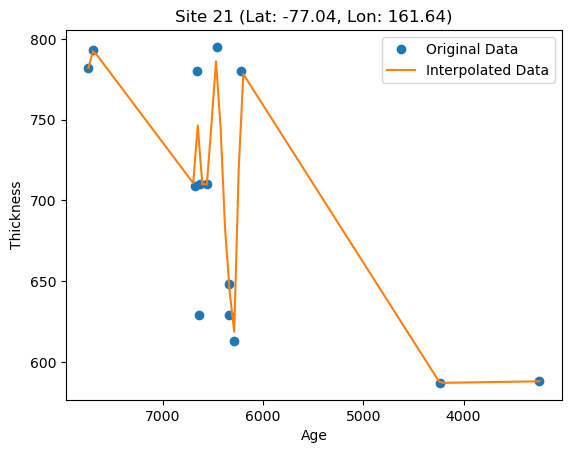

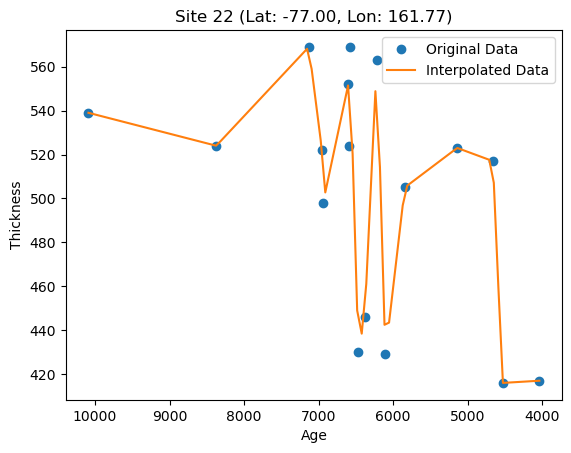

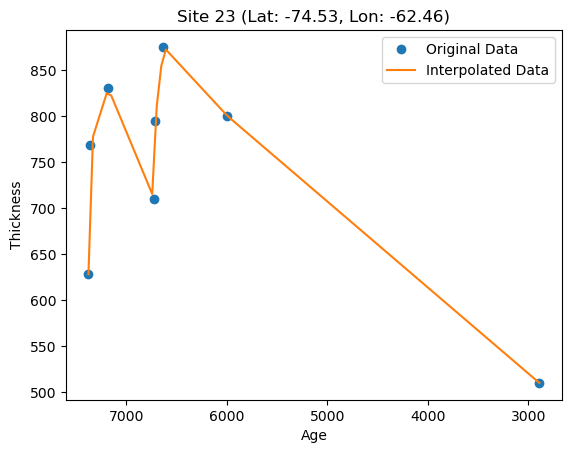

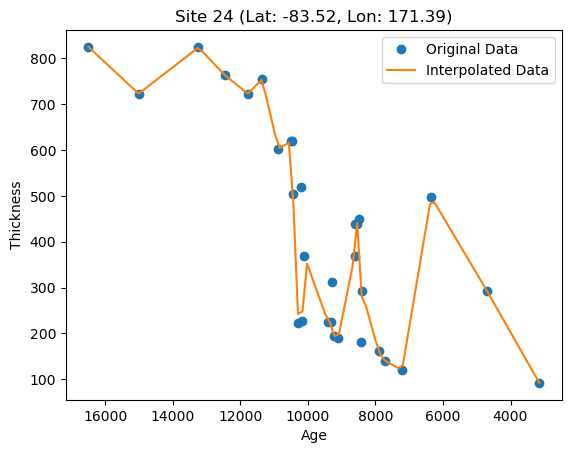

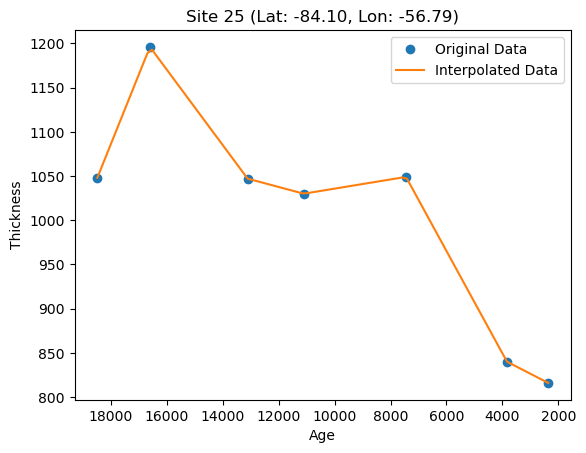

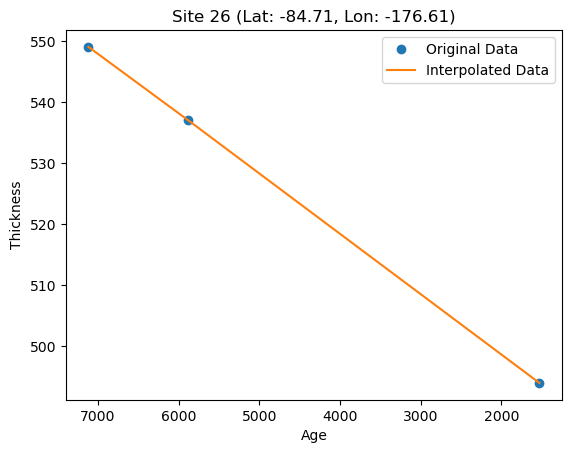

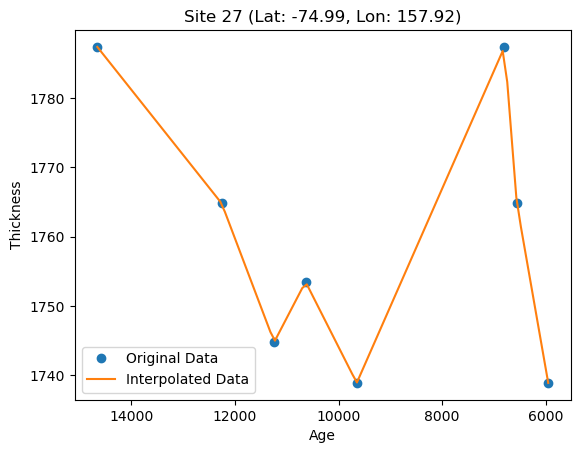

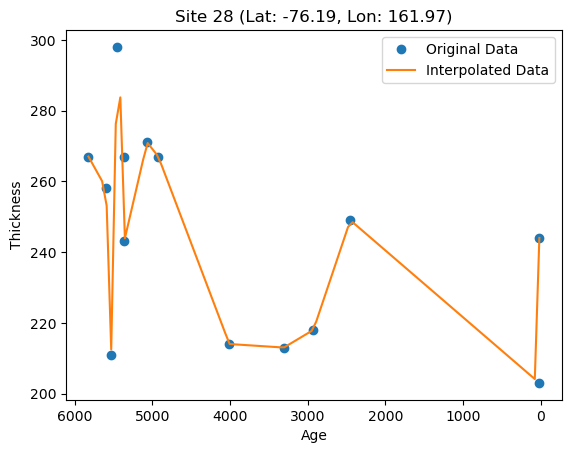

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

# Load the data
file_path = 'ThicknessTimeSeriesLatLon.csv'
df = pd.read_csv(file_path)

# Ensure Age and Thickness columns are numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Thickness'] = pd.to_numeric(df['Thickness'], errors='coerce')
df.dropna(subset=['Age', 'Thickness'], inplace=True)

# Get unique sites
sites = df['Site'].unique()

# Loop through each site
for site in sites:
    site_data = df[df['Site'] == site]
    x = site_data['Age'].values
    y = site_data['Thickness'].values
    
    
    # Extract latitude and longitude for the current site
    latm = site_data['Latm'].iloc[0]
    lonm = site_data['Lonm'].iloc[0]
    
    # Create interpolation function
    f = interpolate.interp1d(x, y)
    
    # Generate new x values (ages) for interpolation
    xnew = np.linspace(min(x), max(x), num=100)  # Adjust the number of points as needed
    ynew = f(xnew)
    
    # Plot the original and interpolated values
    plt.figure()
    plt.plot(x, y, 'o', label='Original Data')
    plt.plot(xnew, ynew, '-', label='Interpolated Data')
    plt.title(f'Site {site} (Lat: {latm:.2f}, Lon: {lonm:.2f})')
    plt.xlabel('Age')
    plt.ylabel('Thickness')
    plt.legend()
    plt.gca().invert_xaxis()
    plt.show()

In [15]:
# Initialize an empty DataFrame to store the interpolated results
interpolated_df = pd.DataFrame(columns=['Site', 'Age', 'Thickness', 'Latm', 'Lonm'])

# Loop through each site
for site in sites:
    site_data = df[df['Site'] == site]
    x = site_data['Age'].values
    y = site_data['Thickness'].values
    
    # Extract latitude and longitude for the current site
    latm = site_data['Latm'].iloc[0]
    lonm = site_data['Lonm'].iloc[0]
    
    # Create interpolation function
    f = interpolate.interp1d(x, y)
    
    # Generate new x values (ages) for interpolation and reverse the order (biggest to smallest)
    xnew = np.linspace(min(x), max(x), num=100)[::-1]  # Reverse the order
    ynew = f(xnew)
    
    # Create a DataFrame with the interpolated data for this site
    temp_df = pd.DataFrame({
        'Site': site,
        'Age': xnew,
        'Thickness': ynew,
        'Latm': latm,
        'Lonm': lonm
    })
    
    # Append the interpolated data to the main DataFrame
    interpolated_df = pd.concat([interpolated_df, temp_df], ignore_index=True)

# Now `interpolated_df` contains all the interpolated data and can be used for further modeling
print(interpolated_df.head())  # Display the first few rows of the interpolated data

# Save the interpolated_df to a CSV file
output_file_path = 'interpolatedthicknesstimeseries.csv'
interpolated_df.to_csv(output_file_path, index=False)

print(f'interpolated_df has been saved to {output_file_path}')


  Site         Age   Thickness       Latm       Lonm
0    1  7577.00000  796.000000 -83.687038 -59.022073
1    1  7550.10101  811.233306 -83.687038 -59.022073
2    1  7523.20202  809.983095 -83.687038 -59.022073
3    1  7496.30303  808.732885 -83.687038 -59.022073
4    1  7469.40404  807.482674 -83.687038 -59.022073
interpolated_df has been saved to interpolatedthicknesstimeseries.csv


/var/folders/yr/1nqwsq391_g0xqbfvxl8g0wh0000gp/T/ipykernel_5687/566613743.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  interpolated_df = pd.concat([interpolated_df, temp_df], ignore_index=True)
